# <center>FINAL PROJECT: International Football After War II<center>

# *Team Information

| FULL NAME             | ID NUMBER |
| :-----------          |     :----:|
| Nguyễn Thiện Hoàng Trí| 20127088  |
| Nguyễn Phước Gia Huy  | 20127038  |


---

## 1. Introduction

### 1.1. Data information

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

The data is gathered from several sources including but not limited to Wikipedia, rsssf.com, and individual football associations' websites.

### 1.2. Attribute information

- `results.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `home_score` - full-time home team score including extra time, not including penalty-shootouts
    - `away_score` - full-time away team score including extra time, not including penalty-shootouts
    - `tournament` - the name of the tournament
    - `city` - the name of the city/town/administrative unit where the match was played
    - `country` - the name of the country where the match was played
    - `neutral` - TRUE/FALSE column indicating whether the match was played at a neutral venue
- `shootouts.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `winner` - winner of the penalty-shootout
- `goalscorers.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `team` - name of the team scoring the goal
    - `scorer` - name of the player scoring the goal
    - `own_goal` - whether the goal was an own-goal
    - `penalty` - whether the goal was a penalty
    
#### NOTE:
Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

### 1.3. Why we select this dataset?
Currently, World Cup 2022 has been received a great deal of public concern over the world. Also both of us are a big fan of this tournament so we decide to explore and analyze more about dataset about football events. After selecting carefully on Kaggle, we find that this dataset ([here](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)) has enough information we need for our project.

## 2. Data Exploration

### IMPORT

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fbmatches_df = pd.read_csv("../datasets/results.csv")
scorers_df = pd.read_csv("../datasets/goalscorers.csv")
penalty_df = pd.read_csv("../datasets/shootouts.csv")

In [3]:
scorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


### How many rows and columns in dataset?
Use pandas to find the number of rows and columns and store in 2 lists `num_rows` and `num_cols`.

In [4]:
RC={}
num_rows=[]
num_cols=[]

num_rows.append(fbmatches_df.shape[0])
num_rows.append(scorers_df.shape[0])
num_rows.append(penalty_df.shape[0])

num_cols.append(fbmatches_df.shape[1])
num_cols.append(scorers_df.shape[1])
num_cols.append(penalty_df.shape[1])

RC['num_rows']=num_rows
RC['num_cols']=num_cols

RC_df=pd.DataFrame(RC,index=['fbmatches_df','scorers_df','penalty_df'])
RC_df

,num_rows,num_cols
fbmatches_df,44353,9
scorers_df,41008,8
penalty_df,547,4


### What is the meaning of each row? Are there any 2 rows with different meaning?
According to data description of the course and by taking a quick look at the data, each line provides information about a match. It seems that there is no outlier line.

### Is the data duplicated?
We going to check that if the value of variable is 1 , the data is duplicated and vice versa

In [5]:
#results.csv
fbmatches_df.index.duplicated().sum() 

0

In [6]:
#goalscorers.csv
scorers_df.index.duplicated().sum() 

0

In [7]:
#shootouts.csv
penalty_df.index.duplicated().sum()

0

### What is the current data type of each column? Are there columns having inappropriate data types?

We  check the datatype (`dtype`) of each element in a column in `fbmatches_df`,`scorers_df`,`penalty_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [8]:
col_dtypes=fbmatches_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [9]:
col_dtypes=scorers_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [10]:
col_dtypes=penalty_df.dtypes
col_dtypes


date         object
home_team    object
away_team    object
winner       object
dtype: object

All the columns have the suitable datatype.

### With each numerical column, how are values distributed?
It looks like that the datatype of columns are numeric. According to this approach, there will be 4 numeric columns ("home_score", "away_score" , "minute" and "date").

In [11]:
fbmatches_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")
scorers_df['date']=pd.to_datetime(scorers_df['date'],format="%Y-%m-%d")
penalty_df['date']=pd.to_datetime(penalty_df['date'],format="%Y-%m-%d")

In [12]:
max_=[]
min_=[]
missing_val=[]

max_.append(max(fbmatches_df['date']))
max_.append(max(fbmatches_df['home_score']))
max_.append(max(fbmatches_df['away_score']))
max_.append(max(scorers_df['minute']))

min_.append(min(fbmatches_df['date']))
min_.append(min(fbmatches_df['home_score']))
min_.append(min(fbmatches_df['away_score']))
min_.append(min(scorers_df['minute']))

missing_val.append(fbmatches_df[fbmatches_df['date'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['home_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['away_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(scorers_df[scorers_df['minute'].isna()].shape[0]/scorers_df.shape[0] *100)

new_number_df=pd.DataFrame(columns=['Max','Min','Missing values'])
new_number_df['Max']=max_
new_number_df['Min']=min_
new_number_df['Missing values']=missing_val

new_number_df.index = ['date','home_score', 'away_score','minute']


new_number_df

,Max,Min,Missing values
date,2022-12-18 00:00:00,1872-11-30 00:00:00,0.000000
home_score,31,0,0.000000
away_score,21,0,0.000000
minute,122.0,1.0,0.629146


### How does the categorical data distribute? 
For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named cate_col_profiles_df. 

Categorical data of `fbmatches_df`:

In [13]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','tournament','city','country'])

cate_col_profiles_df.loc['missing_ratio']=fbmatches_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(fbmatches_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=fbmatches_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=fbmatches_df['home_team'].dropna().unique()
new_list['away_team']=fbmatches_df['away_team'].dropna().unique()
new_list['tournament']=fbmatches_df['tournament'].dropna().unique()
new_list['city']=fbmatches_df['city'].dropna().unique()
new_list['country']=fbmatches_df['country'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,tournament,city,country
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,311.0,306.0,141.0,2010.0,267.0
diff_vals,"[Scotland, England, Wales, Northern Ireland, U...","[England, Scotland, Wales, Northern Ireland, C...","[Friendly, British Home Championship, Évence C...","[Glasgow, London, Wrexham, Blackburn, Belfast,...","[Scotland, England, Wales, Ireland, United Sta..."


Categorical data of `scorers_df`:

In [14]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','team','scorer'])

cate_col_profiles_df.loc['missing_ratio']=scorers_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(scorers_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=scorers_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=scorers_df['home_team'].dropna().unique()
new_list['away_team']=scorers_df['away_team'].dropna().unique()
new_list['team']=scorers_df['team'].dropna().unique()
new_list['scorer']=scorers_df['scorer'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,team,scorer
missing_ratio,0.0,0.0,0.0,0.119489
num_diff_vals,220.0,220.0,220.0,13376.0
diff_vals,"[Chile, Argentina, Brazil, Uruguay, Paraguay, ...","[Uruguay, Chile, Brazil, Argentina, Paraguay, ...","[Uruguay, Argentina, Chile, Brazil, Paraguay, ...","[José Piendibene, Isabelino Gradín, Alberto Oh..."


Categorical data of `penalty_df`:

In [15]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','winner'])

cate_col_profiles_df.loc['missing_ratio']=penalty_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(penalty_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=penalty_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=penalty_df['home_team'].dropna().unique()
new_list['away_team']=penalty_df['away_team'].dropna().unique()
new_list['winner']=penalty_df['winner'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,winner
missing_ratio,0.0,0.0,0.0
num_diff_vals,162.0,172.0,159.0
diff_vals,"[India, South Korea, Thailand, Senegal, Guinea...","[Taiwan, Vietnam Republic, Iraq, South Korea, ...","[Taiwan, South Korea, Iraq, Thailand, Ghana, G..."


## 3. Preprocessing

### Drop every matches which were unofficial and after War II
We found that friendly matches were not suitable for us to explore so we decided to drop those rows.

In [16]:
#fbmatches_df = fbmatches_df[fbmatches_df['tournament'] != 'Friendly']
#fbmatches_df=fbmatches_df.reset_index(drop=True)
fbmatches_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False


In [17]:
# fbmatches_df = fbmatches_df[fbmatches_df['date'].dt.year >= 1945]
# scorers_df =scorers_df[scorers_df['date'].dt.year  >= 1945]
# penalty_df =penalty_df[penalty_df['date'].dt.year  >= 1945]

### Add column `score_status` to dataframe

We need the information of match status that illustrate the winner of the match to answer a question. Therefore, before analyzing data to answer questions, you should preprocess by adding column "score_status" to `fbmatches_df`.

In [18]:
fbmatches_df['score_status']=np.select([fbmatches_df['home_score']>fbmatches_df['away_score'],
                                 fbmatches_df['home_score']<fbmatches_df['away_score'],
                                 fbmatches_df['home_score']==fbmatches_df['away_score']],['H','A','D'])
fbmatches_df['team winner'] = fbmatches_df.apply(lambda x : x['home_team'] if x['home_score'] > x['away_score'] 
                                              else (x['away_team'] if x['home_score'] < x['away_score'] else np.nan),
                                              axis=1)
fbmatches_df['year']=pd.DatetimeIndex(fbmatches_df['date']).year
fbmatches_df['decade']=fbmatches_df['year'] - fbmatches_df['year'] %10
fbmatches_df['month'] = pd.DatetimeIndex(fbmatches_df['date']).month_name()
fbmatches_df['day of Week'] = pd.DatetimeIndex(fbmatches_df['date']).day_name()

In [19]:
fbmatches_df=fbmatches_df.reset_index(drop=True)
scorers_df=scorers_df.reset_index(drop=True)
penalty_df=penalty_df.reset_index(drop=True)

In [20]:
football_df=fbmatches_df.merge(penalty_df,how='left',on=['home_team','away_team','date'])
football_df['team winner']=football_df.apply(lambda x : x['winner'] 
                                             if not pd.isnull(x['winner']) and pd.isnull(x['team winner']) else x['team winner'],axis=1)
football_df.drop(columns=['winner'],inplace=True)

football_df['away_team'] = football_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['away_team'] = football_df['away_team'].replace(['Yemen DPR'], 'Yemen')
football_df['home_team'] = football_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['home_team'] = football_df['home_team'].replace(['Yemen DPR'], 'Yemen')
football_df['away_team'] = football_df['away_team'].replace(['German DR'], 'Germany')
football_df['home_team'] = football_df['home_team'].replace(['German DR'], 'Germany')


football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,month,day of Week
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,NaN,1872,1870,November,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,1873,1870,March,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,1874,1870,March,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,NaN,1875,1870,March,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,1876,1870,March,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False,A,Taiwan,2022,2020,December,Wednesday
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,H,Vietnam,2022,2020,December,Wednesday
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,H,Croatia,2022,2020,December,Saturday
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,H,Singapore,2022,2020,December,Saturday


## 4. Data analyzing to answer questions

### Show the rank of each countries to find the best example for FIFA World Cup
In order to answer this question, we should perform 2 steps:
- Step 1: Slip `fbmatches_df` to 5 dataframe corresponding to 5 continents in over the world: `AFC`, `CONMEBOL`, `UEFA`, `CAF`, and `CONCACAF` based on leagues or tournaments occured for each continents
- Step 2: 

In [21]:
# Những năm đầu tiên được chơi bóng
# home_team=fbmatches_df['home_team'].unique()
#tournament=fbmatches_df['tournament'].unique()
AFC_df = fbmatches_df[(fbmatches_df['tournament'].str.contains('AFC',case=False)) & (fbmatches_df["tournament"].str.contains("NAFC") == False)]
CONMEBOL_df = fbmatches_df[fbmatches_df['tournament'].str.contains('COPA América',case=False)]
UEFA_df = fbmatches_df[fbmatches_df['tournament'].str.contains('UEFA',case=False) & (fbmatches_df["tournament"].str.contains("CONMEBOL") == False)]
CAF_df = fbmatches_df[fbmatches_df['tournament'].str.contains('African ',case=False) & (fbmatches_df["tournament"].str.contains("West") == False)]
CONCACAF_df =fbmatches_df[fbmatches_df['tournament'].str.contains('CONCACAF',case=False)]

AFC_df=AFC_df.reset_index(drop=True) # Asian
CONMEBOL_df=CONMEBOL_df.reset_index(drop=True) # South America
UEFA_df=UEFA_df.reset_index(drop=True) # European
CAF_df=CAF_df.reset_index(drop=True) # Africa
CONCACAF_df=CONCACAF_df.reset_index(drop=True) # North America

AFC_df['away_team'] = AFC_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
AFC_df['away_team'] = AFC_df['away_team'].replace(['Yemen DPR'], 'Yemen')
AFC_df['home_team'] = AFC_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
AFC_df['home_team'] = AFC_df['home_team'].replace(['Yemen DPR'], 'Yemen')

UEFA_df['away_team'] = UEFA_df['away_team'].replace(['German DR'], 'Germany')
UEFA_df['home_team'] = UEFA_df['home_team'].replace(['German DR'], 'Germany')

CAF_df= CAF_df[CAF_df['away_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['away_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['away_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['away_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['away_team'] != 'Tahiti']
CAF_df= CAF_df[CAF_df['away_team'] != 'Saint Pierre and Miquelon']

CAF_df= CAF_df[CAF_df['home_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['home_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['home_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['home_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['home_team'] != 'Tahiti']

AFC= list(AFC_df['away_team'].sort_values().unique())
CAF= list(CAF_df['away_team'].sort_values().unique())
UEFA= list(UEFA_df['away_team'].sort_values().unique())
CONCACAF= list(CONCACAF_df['away_team'].sort_values().unique())
CONMEBOL= ['Argentina' ,'Bolivia' ,'Brazil' ,'Chile' ,'Colombia' ,'Ecuador' ,'Paraguay' ,'Peru' ,'Uruguay','Venezuela']
OFC = ['American Samoa' ,'Cook Islands' ,'Fiji' ,'Kiribati' ,'New Caledonia' ,'New Zealand' 
          ,' Niue' ,'Papua New Guinea' ,'Samoa','Solomon Islands','Tahiti','Tonga','Tuvalu','Vanuatu']
# 'AFC' in fbmatches_df['tournament']
# fbmatches_df[fbmatches_df['tournament']=="CONMEBOL–UEFA Cup of Champions]

Countries_df = pd.DataFrame({
    'Team': AFC + CAF  + CONCACAF + CONMEBOL + OFC + UEFA,
    'Organization' : ['AFC'] * len(AFC) + ['CAF'] * len(CAF) + ['CONCACAF'] * len(CONCACAF) + ['CONMEBOL'] * len(CONMEBOL) + ['OFC'] * len(OFC) + ['UEFA'] * len(UEFA),
    'Region' : ['Asia'] * len(AFC) + ['Africa'] * len(CAF) + ['North and Central America'] * len(CONCACAF) + ['South America'] * len(CONMEBOL) + ['Oceania'] * len(OFC) + ['Europe'] * len(UEFA),
})
Countries_df

Teams=list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())
Teams_df=pd.DataFrame({'Team': list(set(Teams))})
Teams_df['First year']=Teams_df['Team'].apply(lambda x : football_df[(football_df['home_team']==x) | (football_df['away_team']==x)]['year'].values[0])
Teams_df['First decade']=Teams_df['First year']-Teams_df['First year']%10
Teams_df=Teams_df.merge(Countries_df,how='left',on=['Team'])
Teams_df.sort_values(by='First year',inplace=True)
Teams_df

,Team,First year,First decade,Organization,Region
274,Scotland,1872,1870,UEFA,Europe
203,England,1872,1870,UEFA,Europe
179,Wales,1876,1870,UEFA,Europe
94,Northern Ireland,1882,1880,UEFA,Europe
271,Canada,1885,1880,CONCACAF,North and Central America
...,...,...,...,...,...
239,Maule Sur,2022,2020,NaN,NaN
237,Biafra,2022,2020,NaN,NaN
295,Yoruba Nation,2022,2020,NaN,NaN
75,Brunei Darussalam,2022,2020,NaN,NaN


- AFC - Asian Football Confederation - `47 members` - founded in 1954, represents Asian nations in football. The main tournament is the AFC Asian Cup. ( But in this data AFC has `49 members`. Therefore, Israel join  UEFA member in 1994 and Kazakhstan join UEFA member in 2002)
- CAF - Confédération Africaine de Football - `54 members` - founded in 1957 - represents African nations in football. The main tournament is the African Cup of Nations.

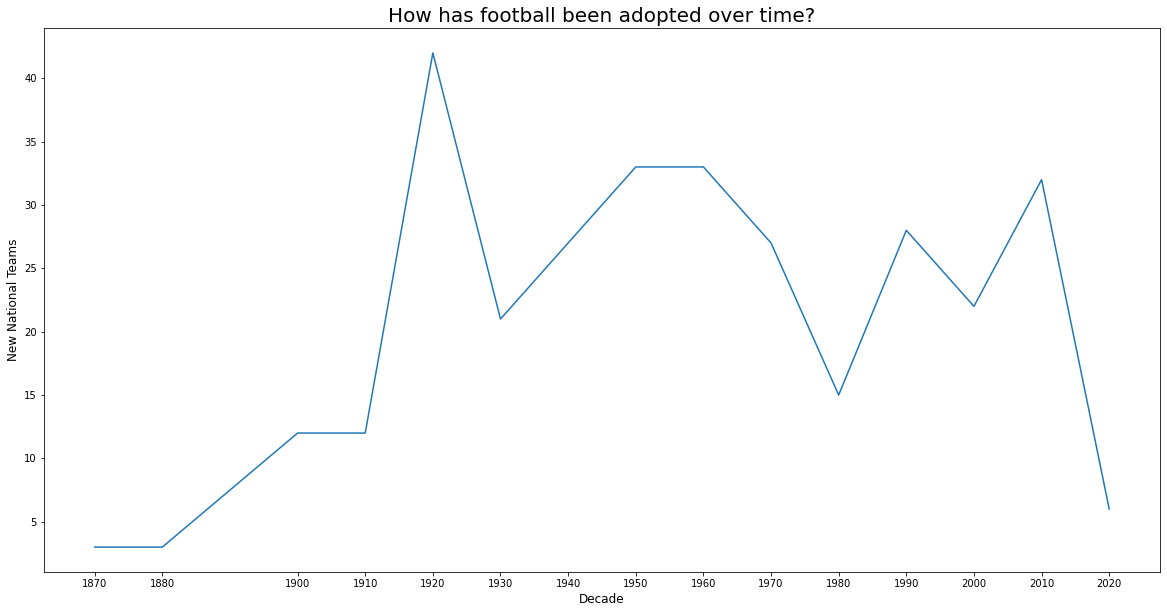

In [22]:
new_teams_decade = Teams_df['First decade'].value_counts().sort_index()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=new_teams_decade, x=new_teams_decade.index, y=new_teams_decade.values)
ax.set_title('How has football been adopted over time?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
ax.set(xticks=new_teams_decade.index);

In [23]:
new_teams_decade_region_df= Teams_df.groupby(['First decade','Region']).size().unstack('Region')
new_teams_decade_region_df

Region,Africa,Asia,Europe,North and Central America,Oceania,South America
First decade,,,,,,
1870,NaN,NaN,3.0,NaN,NaN,NaN
1880,NaN,NaN,1.0,2.0,NaN,NaN
1900,NaN,NaN,10.0,NaN,NaN,2.0
1910,NaN,2.0,5.0,NaN,NaN,3.0
1920,4.0,2.0,14.0,13.0,1.0,2.0
1930,1.0,3.0,2.0,10.0,NaN,3.0
1940,11.0,8.0,5.0,2.0,NaN,NaN
1950,12.0,11.0,3.0,NaN,4.0,NaN
1960,17.0,9.0,NaN,2.0,2.0,NaN


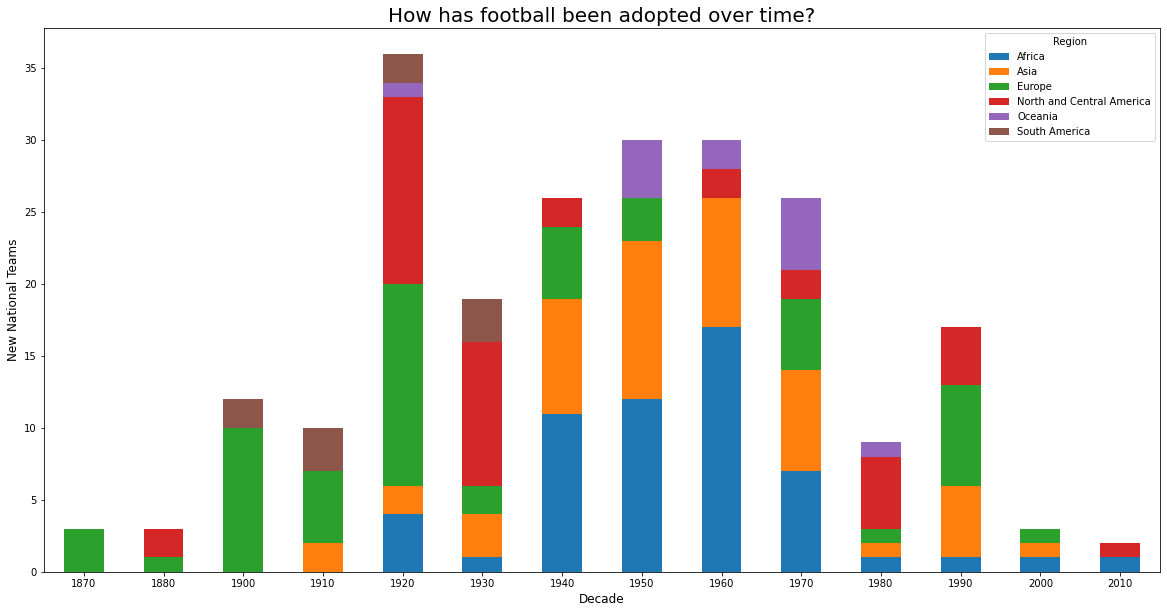

In [24]:
ax = new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('How has football been adopted over time?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
plt.xticks(rotation=0);

### The overall development of the world cup

1. Look over the number of national teams participating over the decades
- Firstly, we have seen that world cup have 2 tournaments. There are `FIFA World Cup` and `FIFA World Cup qualification`.
- Secondly, the World Cup was not held in 1942 and 1946 because of the world war II and before that it was held firstly in 1930 but it organized on a rather small scale, so that we decide to take only data since 1949 (The 1950 World Cup).
- And add `season` colcumn to dataframe to easy for analyzing.

In [25]:
worldcup_df=football_df[(football_df['tournament'].isin(["FIFA World Cup","FIFA World Cup qualification"])) & (football_df['year']>=1949)].copy().reset_index(drop=True)
worldcup_df.loc[:,'season']=(worldcup_df['date'].dt.year+1)//4*4+2
worldcup_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,month,day of Week,season
0,1949-06-02,Sweden,Republic of Ireland,3,1,FIFA World Cup qualification,Solna,Sweden,False,H,Sweden,1949,1940,June,Thursday,1950
1,1949-06-26,Switzerland,Luxembourg,5,2,FIFA World Cup qualification,Zürich,Switzerland,False,H,Switzerland,1949,1940,June,Sunday,1950
2,1949-08-21,Yugoslavia,Israel,6,0,FIFA World Cup qualification,Belgrade,Yugoslavia,False,H,Yugoslavia,1949,1940,August,Sunday,1950
3,1949-09-08,Republic of Ireland,Finland,3,0,FIFA World Cup qualification,Dublin,Republic of Ireland,False,H,Republic of Ireland,1949,1940,September,Thursday,1950
4,1949-09-18,Israel,Yugoslavia,2,5,FIFA World Cup qualification,Tel Aviv,Israel,False,A,Yugoslavia,1949,1940,September,Sunday,1950


- We synthesize lists of national teams attending in each season

In [26]:

def mix(x:pd.Series):
    return (list(set(x['home_team'].tolist()+x['away_team'].tolist())))

wc_home_team=worldcup_df.groupby(["season"])["home_team"].unique()
wc_away_team=worldcup_df.groupby(["season"])["away_team"].unique()
wc_team=pd.concat([wc_home_team,wc_away_team],axis=1).apply(mix,axis=1)

wc_team.head()

season
1950    [Wales, Yugoslavia, Syria, Paraguay, Switzerla...
1954    [Wales, Yugoslavia, Paraguay, Bulgaria, Switze...
1958    [Curaçao, Sudan, Peru, Wales, Yugoslavia, Syri...
1962    [Curaçao, Wales, Peru, Yugoslavia, Cyprus, Bul...
1966    [Curaçao, Wales, Peru, Yugoslavia, Paraguay, B...
dtype: object

- Because of there are too much seasons, so we decide to visualize in decades, in that order we combine seasons data into decades.
- Countries are being classified by region, so that it can be more detail to describe, I guess.

In [27]:
tmp=wc_team.explode().reset_index(name='Team')
tmp.loc[:,'decade']=tmp['season']//10*10
tmp=tmp.drop(columns=['season']).drop_duplicates()
wc_new_teams_decade_region_df=tmp.merge(Teams_df[['Team','Region']],how='left',on=['Team']).groupby(['decade','Region']).size().unstack(level=1)
wc_new_teams_decade_region_df

Region,Africa,Asia,Europe,North and Central America,Oceania,South America
decade,,,,,,
1950,2.0,6.0,30.0,8.0,NaN,8.0
1960,5.0,5.0,31.0,10.0,NaN,10.0
1970,29.0,19.0,33.0,13.0,1.0,10.0
1980,32.0,26.0,33.0,4.0,2.0,10.0
1990,41.0,39.0,53.0,29.0,9.0,10.0
2000,52.0,45.0,52.0,35.0,11.0,10.0
2010,54.0,48.0,55.0,35.0,10.0,10.0
2020,54.0,48.0,55.0,34.0,7.0,10.0


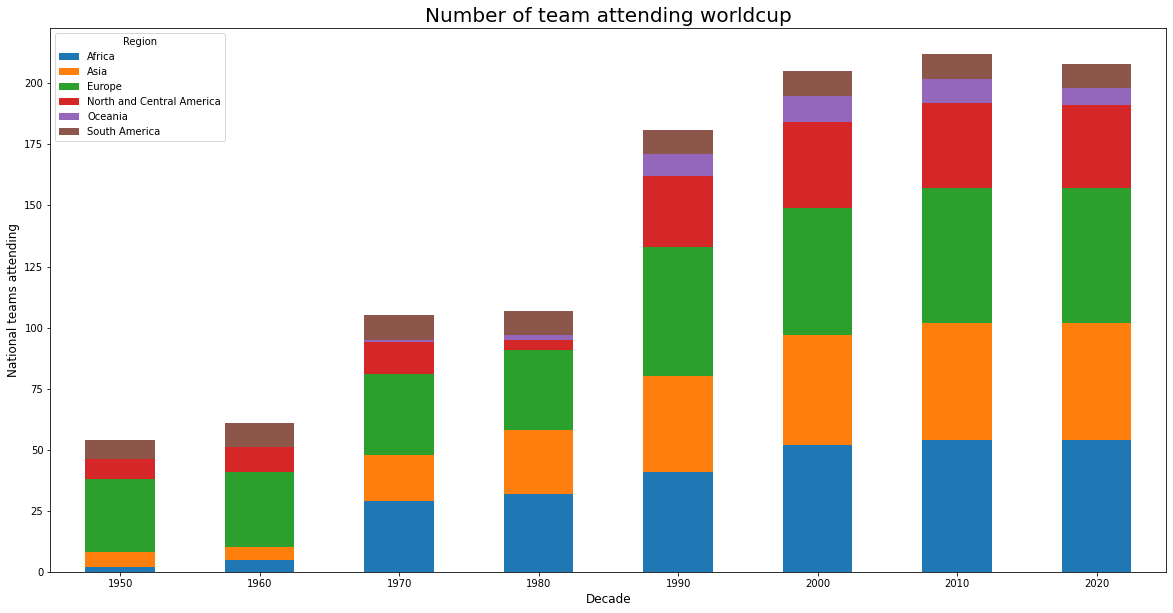

In [28]:

ax = wc_new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('Number of team attending worldcup', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='National teams attending', size=12)
plt.xticks(rotation=0);

In [29]:



# wc_team_score_df=worldcup_df.melt(id_vars=['date'],value_vars=['home_team','away_team'],value_name='team').sort_values(by=['date']).drop(columns='variable').reset_index(drop=True)

a=worldcup_df[['date','home_team','away_team','season','tournament']].rename(columns={'home_team':'team','away_team':'competitor'})
b=worldcup_df[['date','home_team','away_team','season','tournament']].rename(columns={'home_team':'competitor','away_team':'team'})
wc_team_score_df=a.merge(b,how='outer',on=['date','team','competitor','season','tournament']).sort_values(by='date').reset_index(drop=True)


# wc_team_score_df.loc[:,['hafl_time','second_half']]=np.zeros((wc_team_score_df.shape[0],2))
# wc_team_score_df
wc_score_df=wc_team_score_df.merge(scorers_df[['date','team','scorer','minute']],how='left',on=['date','team']).sort_values(by='date')

wc_half_score=wc_score_df[wc_score_df['minute']<=45].groupby(['date','team']).size().reset_index(name='first_half')
wc_full_score=wc_score_df[(45<wc_score_df['minute']) & (wc_score_df['minute']<=90)].groupby(['date','team']).size().reset_index(name='second_half')
wc_extra_time_score=wc_score_df[wc_score_df['minute']>90].groupby(['date','team']).size().reset_index(name='extra_time')

wc_team_score_df=wc_team_score_df.merge(wc_half_score,how='left',on=['date','team'])
wc_team_score_df=wc_team_score_df.merge(wc_full_score,how='left',on=['date','team'])
wc_team_score_df=wc_team_score_df.merge(wc_extra_time_score,how='left',on=['date','team'])

wc_team_score_df.fillna(0,inplace=True)

wc_team_score_df.loc[:,'total_score']=wc_team_score_df[['first_half','second_half','extra_time']].sum(axis=1)
wc_team_score_df.loc[:,'decade']=wc_team_score_df['season']//10*10

wc_team_score_df

,date,team,competitor,season,tournament,first_half,second_half,extra_time,total_score,decade
0,1949-06-02,Sweden,Republic of Ireland,1950,FIFA World Cup qualification,2.0,1.0,0.0,3.0,1950
1,1949-06-02,Republic of Ireland,Sweden,1950,FIFA World Cup qualification,1.0,0.0,0.0,1.0,1950
2,1949-06-26,Switzerland,Luxembourg,1950,FIFA World Cup qualification,3.0,2.0,0.0,5.0,1950
3,1949-06-26,Luxembourg,Switzerland,1950,FIFA World Cup qualification,1.0,1.0,0.0,2.0,1950
4,1949-08-21,Yugoslavia,Israel,1950,FIFA World Cup qualification,4.0,2.0,0.0,6.0,1950
...,...,...,...,...,...,...,...,...,...,...
17476,2022-12-14,France,Morocco,2022,FIFA World Cup,1.0,1.0,0.0,2.0,2020
17477,2022-12-17,Morocco,Croatia,2022,FIFA World Cup,1.0,0.0,0.0,1.0,2020
17478,2022-12-17,Croatia,Morocco,2022,FIFA World Cup,2.0,0.0,0.0,2.0,2020
17479,2022-12-18,Argentina,France,2022,FIFA World Cup,2.0,0.0,1.0,3.0,2020


In [30]:
top10_country=list(wc_team_score_df[wc_team_score_df['tournament']=='FIFA World Cup'].groupby(['team'])['total_score'].sum().sort_values(ascending=False)[:10].index)
top10_country

['Germany',
 'Brazil',
 'Argentina',
 'France',
 'Italy',
 'England',
 'Spain',
 'Netherlands',
 'Russia',
 'Uruguay']

In [31]:
top10_country_score_df=wc_team_score_df[wc_team_score_df['team'].isin(top10_country)].groupby(['team','decade'])['total_score'].sum().unstack(level=1)

top10_country_score_df.loc[:,'total_score']=top10_country_score_df.sum(axis=1)
top10_country_score_df.sort_values(by='total_score',inplace=True)
top10_country_score_df

decade,1950,1960,1970,1980,1990,2000,2010,2020,total_score
team,,,,,,,,,
Uruguay,35.0,20.0,21.0,13.0,37.0,50.0,114.0,24.0,314.0
Russia,23.0,49.0,24.0,52.0,57.0,45.0,54.0,19.0,323.0
Italy,22.0,32.0,64.0,29.0,61.0,50.0,64.0,13.0,335.0
France,69.0,21.0,21.0,63.0,42.0,23.0,81.0,34.0,354.0
Spain,35.0,18.0,24.0,24.0,97.0,65.0,97.0,24.0,384.0
Argentina,15.0,26.0,37.0,34.0,55.0,84.0,101.0,42.0,394.0
Netherlands,12.0,10.0,74.0,24.0,87.0,60.0,99.0,43.0,409.0
England,54.0,32.0,22.0,47.0,66.0,45.0,100.0,52.0,418.0
Brazil,56.0,18.0,75.0,42.0,61.0,94.0,102.0,48.0,496.0


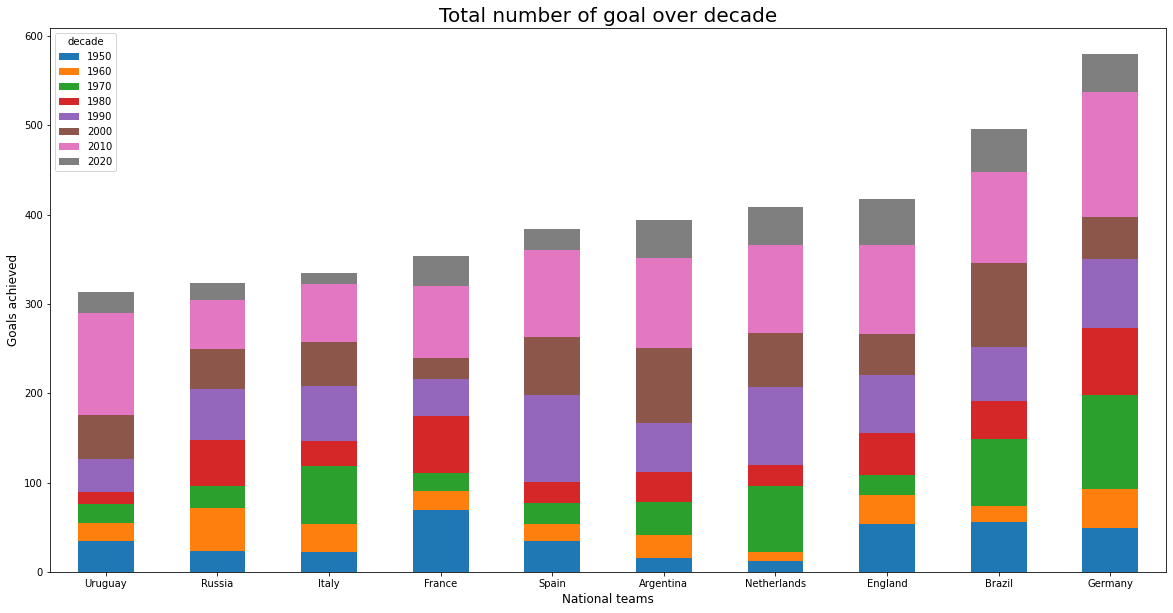

In [32]:
ax = top10_country_score_df.drop(columns=['total_score']).plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('Total number of goal over decade', size=20)
ax.set_xlabel(xlabel='National teams', size=12)
ax.set_ylabel(ylabel='Goals achieved', size=12)
plt.xticks(rotation=0);

In [33]:
def check_Play_Style(x: pd.Series):
    if x['first_half']>x['second_half']:
        return -1
    return int(x['first_half']<x['second_half'])
wc_team_score_df.loc[:,'style']=wc_team_score_df.apply(check_Play_Style,axis=1)
play_style_df=wc_team_score_df[wc_team_score_df['first_half']!=wc_team_score_df['second_half']].groupby(['team','season'])['style'].mean()[top10_country].unstack(level=0)
play_style_df

team,Germany,Brazil,Argentina,France,Italy,England,Spain,Netherlands,Russia,Uruguay
season,,,,,,,,,,
1950,NaN,0.500000,NaN,0.000000,NaN,0.333333,0.142857,NaN,NaN,1.000000
1954,0.555556,0.200000,NaN,0.500000,0.600000,0.500000,1.000000,NaN,NaN,0.500000
1958,-0.200000,0.666667,0.200000,0.000000,0.333333,0.666667,-1.000000,-0.333333,0.500000,1.000000
1962,-0.333333,1.000000,0.000000,0.333333,1.000000,-0.142857,0.200000,0.000000,-0.428571,-0.200000
1966,-0.200000,0.000000,-0.200000,-0.333333,1.000000,1.000000,0.500000,0.333333,0.250000,0.500000
1970,0.230769,0.454545,0.333333,0.000000,-0.250000,1.000000,0.000000,-0.333333,0.500000,0.000000
1974,-0.111111,1.000000,-0.428571,1.000000,0.000000,-0.333333,0.000000,0.000000,1.000000,0.000000
1978,-1.000000,-0.111111,0.000000,0.000000,-0.428571,1.000000,0.600000,0.111111,0.000000,-1.000000
1982,-0.076923,1.000000,1.000000,-0.250000,0.111111,0.200000,1.000000,0.200000,-0.111111,0.333333


In [34]:
wc_team_score_df[(wc_team_score_df['season']==2022) & (wc_team_score_df['competitor']=='France')]

,date,team,competitor,season,tournament,first_half,second_half,extra_time,total_score,decade,style
15941,2021-03-24,Ukraine,France,2022,FIFA World Cup qualification,0.0,1.0,0.0,1.0,2020,1
16049,2021-03-28,Kazakhstan,France,2022,FIFA World Cup qualification,0.0,0.0,0.0,0.0,2020,0
16145,2021-03-31,Bosnia and Herzegovina,France,2022,FIFA World Cup qualification,0.0,0.0,0.0,0.0,2020,0
16362,2021-09-01,Bosnia and Herzegovina,France,2022,FIFA World Cup qualification,1.0,0.0,0.0,1.0,2020,-1
16493,2021-09-04,Ukraine,France,2022,FIFA World Cup qualification,1.0,0.0,0.0,1.0,2020,-1
16570,2021-09-07,Finland,France,2022,FIFA World Cup qualification,0.0,0.0,0.0,0.0,2020,0
17016,2021-11-13,Kazakhstan,France,2022,FIFA World Cup qualification,0.0,0.0,0.0,0.0,2020,0
17139,2021-11-16,Finland,France,2022,FIFA World Cup qualification,0.0,0.0,0.0,0.0,2020,0
17366,2022-11-22,Australia,France,2022,FIFA World Cup,1.0,0.0,0.0,1.0,2020,-1
17396,2022-11-26,Denmark,France,2022,FIFA World Cup,0.0,1.0,0.0,1.0,2020,1


In [35]:
((play_style_df*2.5000001).round()/(play_style_df*2.5000001).round().abs().replace(0,1)).mean()

team
Germany        0.166667
Brazil         0.578947
Argentina     -0.117647
France         0.277778
Italy          0.000000
England        0.526316
Spain          0.578947
Netherlands    0.470588
Russia         0.352941
Uruguay        0.315789
dtype: float64

Đa số các nước đều đẩy mạnh ghi bàn về cuối

In [36]:
goal_time_season=wc_team_score_df.groupby('season')[['first_half','second_half']].mean()

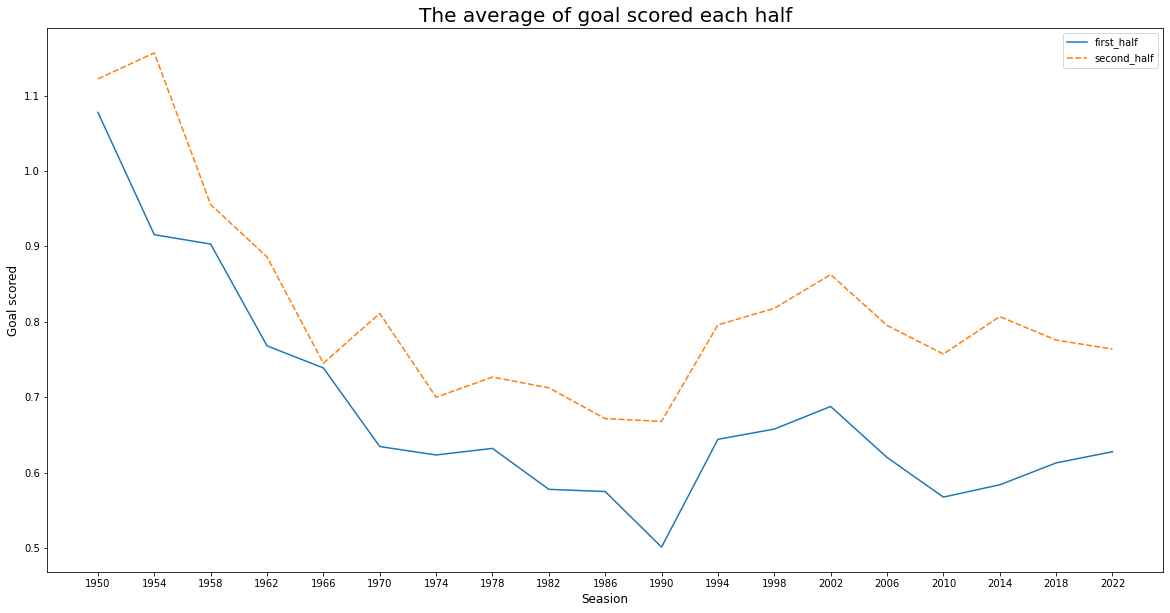

In [37]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=goal_time_season)
ax.set_title('The average of goal scored each half', size=20)
ax.set_xlabel(xlabel='Seasion', size=12)
ax.set_ylabel(ylabel='Goal scored', size=12)
ax.set(xticks=goal_time_season.index);

In [38]:
penalty_df.groupby(['winner'])['date'].size().sort_values(ascending=False)[:5]


# penalty_df[(penalty_df['home_team']=='Argentina') | (penalty_df['away_team']=='Argentina')]

winner
Argentina       14
South Korea     13
Egypt           13
Zambia          13
South Africa    11
Name: date, dtype: int64

In [39]:
# def top_Goal_Scorer(x: pd.Series):
#     t=list(x.idxmax())
#     t.append(x[x.idxmax()])
#     return t


# top_goal_scorer=scorers_df[scorers_df['own_goal']==False].merge(worldcup_df[worldcup_df['tournament']=='FIFA World Cup'][['date','home_team','away_team','season']],how='inner',on=['date','home_team','away_team'])

# top_goal_scorer=top_goal_scorer.groupby(['season','scorer','team']).size().unstack(level=0).apply(top_Goal_Scorer).T


# # t=a.(lambda x: [x.idxmax(),x[x.idxmax()]])
# top_goal_scorer.rename(columns={ 0:'scorer',1:'team',2:'score'},inplace=True)

# top_goal_scorer







def find_Top_Goal_Scorer(x: pd.Series):
    max_goal=x['score'].max()
    top_scorer=x[x['score']==max_goal]
    min_pen=top_scorer['pen_score'].min()

    return top_scorer[top_scorer['pen_score']==min_pen]


top_goal_scorer=scorers_df[scorers_df['own_goal']==False].merge(worldcup_df[worldcup_df['tournament']=='FIFA World Cup'][['date','home_team','away_team','season']],how='inner',on=['date','home_team','away_team'])
# top_goal_scorer

# top_goal_scorer=top_goal_scorer.groupby(['season','scorer','team']).agg(['count','sum']).reset_index(name='score').groupby(['season']).apply(find_Top_Goal_Scorer)
# top_goal_scorer.merge(scorers_df[scorers_df['penalty']==True],how='inner',on=['season','scorer'])

top_goal_scorer=top_goal_scorer.groupby(['season','scorer','team'])['penalty'].agg(['size','sum']).reset_index().rename(columns={'size':'score','sum':'pen_score'}).groupby(['season'])[['scorer','team','score','pen_score']].apply(find_Top_Goal_Scorer)

top_goal_scorer=top_goal_scorer.reset_index().drop(columns='level_1')
top_goal_scorer

,season,scorer,team,score,pen_score
0,1950,Ademir de Menezes,Brazil,9,0
1,1954,Sándor Kocsis,Hungary,11,0
2,1958,Just Fontaine,France,13,0
3,1962,Dražan Jerković,Yugoslavia,4,0
4,1962,Flórián Albert,Hungary,4,0
5,1962,Garrincha,Brazil,4,0
6,1962,Valentin Kozmich Ivanov,Russia,4,0
7,1962,Vavá,Brazil,4,0
8,1966,Eusébio,Portugal,9,4
9,1970,Gerd Müller,Germany,10,1


In [40]:
top_goal_team=wc_team_score_df[wc_team_score_df['tournament']=='FIFA World Cup'].groupby(['season','team'])['total_score'].sum().unstack(level=0).agg(['idxmax','max']).T
top_goal_team.rename(columns={'idxmax':'team','max':'score'},inplace=True)

top_goal_team

,team,score
season,,
1950,Brazil,22.0
1954,Hungary,27.0
1958,France,23.0
1962,Brazil,14.0
1966,Portugal,17.0
1970,Brazil,19.0
1974,Germany,46.0
1978,Argentina,15.0
1982,France,16.0


Text(0.5, 1.0, 'Player')

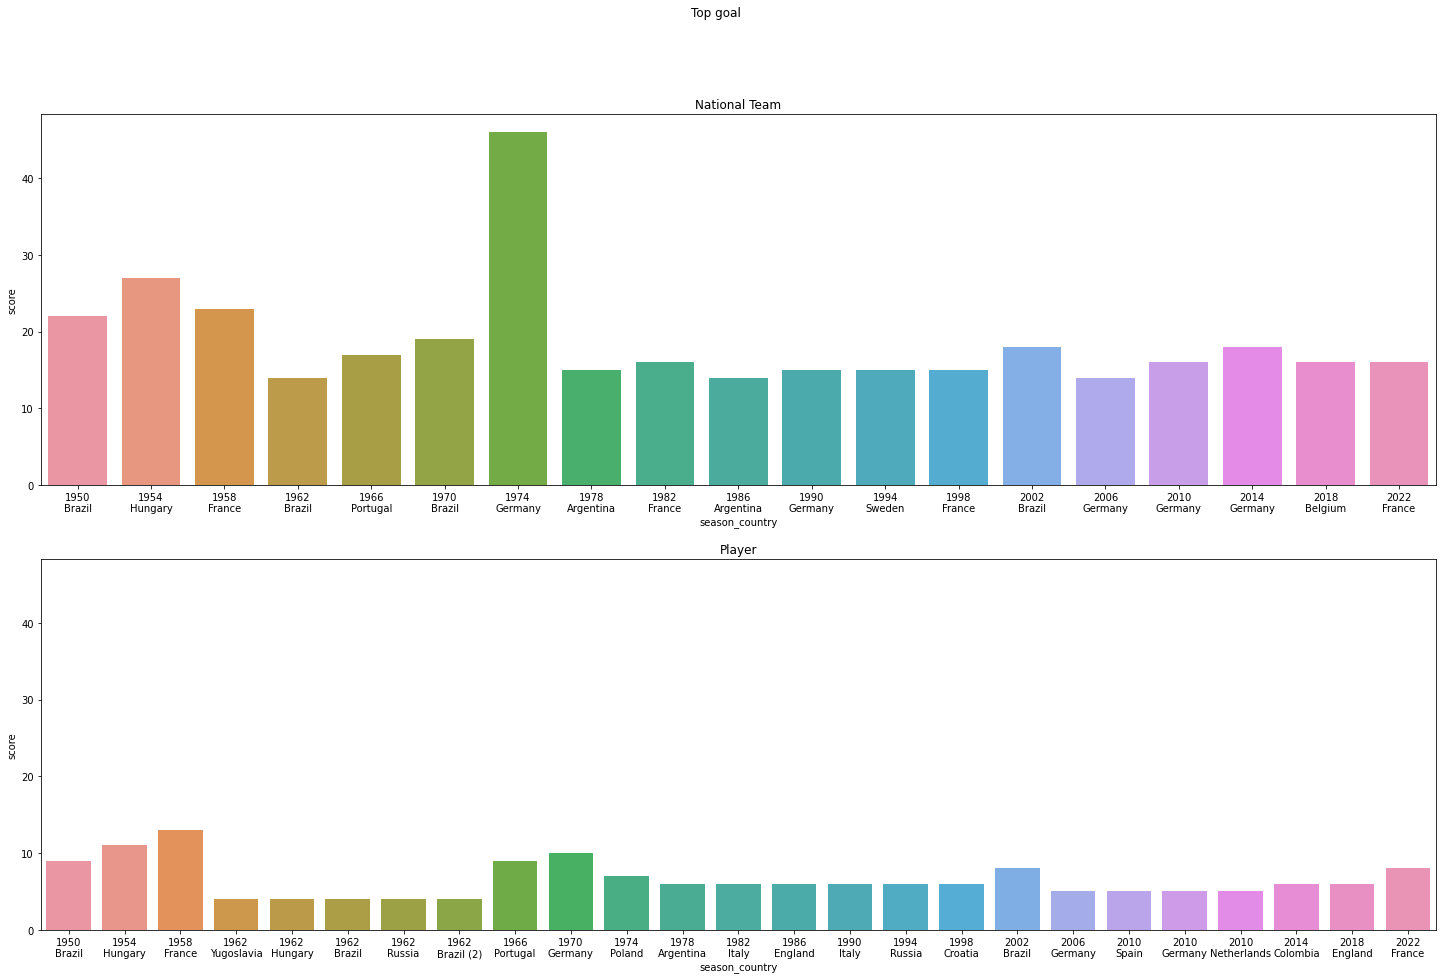

In [41]:


top_goal_team.loc[:,'season_country']=top_goal_team.apply(lambda x: str(x.name)+'\n'+x['team'],axis=1)


top_goal_scorer.loc[:,'season_country']=top_goal_scorer.apply(lambda x: str(x['season'])+'\n'+x['team'],axis=1)
top_goal_scorer.loc[top_goal_scorer[top_goal_scorer['season_country'].duplicated()].index,'season_country']+=str(' (2)')


fig, axes = plt.subplots(2, 1, figsize=(25, 15), sharey=True)
fig.suptitle('Top goal')

# Bulbasaur
sns.barplot(ax=axes[0], x=top_goal_team['season_country'], y=top_goal_team['score'])
axes[0].set_title('National Team')

# Charmander
sns.barplot(ax=axes[1], x=top_goal_scorer['season_country'], y=top_goal_scorer['score'])
axes[1].set_title('Player')

# Squirtle
# sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
# axes[2].set_title(squirtle.name)

In [42]:
def find_Last_Days(x: pd.Series):
    t=x.loc[x['date'].index[-2:]].set_index('date')
    top3=[x.iloc[-1]['team winner']]
    tmp=(x.iloc[-1][['home_team','away_team']].tolist())
    tmp.remove(top3[0])
    top3.extend(tmp)
    # top3=x.iloc[-1][['home_team','away_team']].tolist().remove() if x.iloc[-1]['score_status']=='H' else x.iloc[-1][['away_team','home_team']].tolist()
    top3.append(x.iloc[-2]['team winner'])
    return top3

wc_top3=worldcup_df.groupby(['season']).apply(find_Last_Days)
wc_top3


season
1950             [Sweden, Spain, Uruguay]
1954          [Germany, Hungary, Austria]
1958             [Brazil, Sweden, France]
1962      [Brazil, Czechoslovakia, Chile]
1966         [England, Germany, Portugal]
1970             [Brazil, Italy, Germany]
1974       [Germany, Netherlands, Poland]
1978     [Argentina, Netherlands, Brazil]
1982             [Italy, Germany, Poland]
1986         [Argentina, Germany, France]
1990          [Germany, Argentina, Italy]
1994              [Brazil, Italy, Sweden]
1998            [France, Brazil, Croatia]
2002            [Brazil, Germany, Turkey]
2006             [Italy, France, Germany]
2010        [Spain, Netherlands, Germany]
2014    [Germany, Argentina, Netherlands]
2018           [France, Croatia, Belgium]
2022         [Argentina, France, Croatia]
dtype: object

In [43]:
# top_goal_scorer.loc[:,'top_3']=wc_top3
# top_goal_scorer.merge(wc_top3,how='left',on='season')

def check_if_in_top(x: pd.Series):
    try:
        return x['top_3'].index(x['team'])+1
    except:
        return np.NaN


top_goal_scorer.loc[:,'top']=top_goal_scorer.merge(wc_top3.reset_index(name='top_3'),how='left',on='season').apply(check_if_in_top ,axis=1)
top_goal_scorer

,season,scorer,team,score,pen_score,season_country,top
0,1950,Ademir de Menezes,Brazil,9,0,1950\nBrazil,NaN
1,1954,Sándor Kocsis,Hungary,11,0,1954\nHungary,2.0
2,1958,Just Fontaine,France,13,0,1958\nFrance,3.0
3,1962,Dražan Jerković,Yugoslavia,4,0,1962\nYugoslavia,NaN
4,1962,Flórián Albert,Hungary,4,0,1962\nHungary,NaN
5,1962,Garrincha,Brazil,4,0,1962\nBrazil,1.0
6,1962,Valentin Kozmich Ivanov,Russia,4,0,1962\nRussia,NaN
7,1962,Vavá,Brazil,4,0,1962\nBrazil (2),1.0
8,1966,Eusébio,Portugal,9,4,1966\nPortugal,3.0
9,1970,Gerd Müller,Germany,10,1,1970\nGermany,3.0
